In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("../data/energy_and_weather.csv",delimiter=',',encoding='UTF-8')

In [39]:
df = df[['timestamp','electricity_usage', 'Graz Temperature [2 m elevation corrected]', 'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [40]:
df.describe()

,electricity_usage,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
count,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000
mean,1.703868,14.924981,180.286804,109.849497,70.437306,61.180348,0.437604,16.355514,9.197968,2021.000207,11.500000
std,1.514367,8.830604,246.010558,161.140322,89.518911,13.795965,0.496143,8.763619,1.909085,0.014398,6.922904
min,0.000000,-3.458630,0.000000,-8.570068,0.000000,28.000000,0.000000,1.000000,1.000000,2021.000000,0.000000
25%,0.740000,7.461370,0.000000,0.000000,0.000000,51.000000,0.000000,9.000000,8.000000,2021.000000,5.750000
50%,1.120000,15.471369,12.460000,3.896466,5.975124,61.000000,0.000000,17.000000,9.000000,2021.000000,11.500000
75%,3.072500,22.201370,329.300000,187.765255,140.326493,71.000000,1.000000,24.000000,11.000000,2021.000000,17.250000
max,8.420000,34.121372,888.220000,603.423100,295.416660,98.000000,1.000000,31.000000,12.000000,2022.000000,23.000000


In [41]:
Q1,Q3 = np.percentile(df['electricity_usage'] , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

In [42]:
outliers = df['electricity_usage'][(df['electricity_usage'] > ul) | (df['electricity_usage'] < ll)]


<AxesSubplot: >

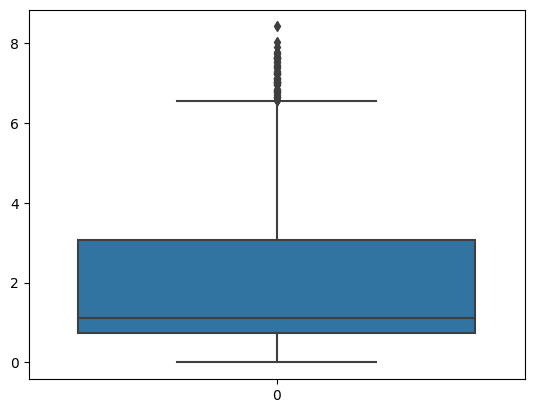

In [43]:
sns.boxplot(df['electricity_usage'])

In [44]:
df_no_outliers = pd.merge(df,outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

<AxesSubplot: >

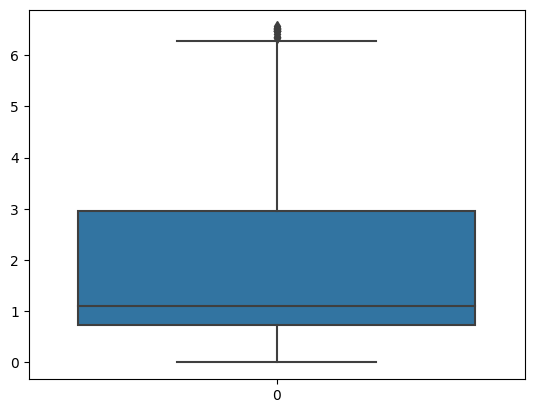

In [45]:
sns.boxplot(df_no_outliers['electricity_usage'])